# Problem Statement
![Example 4.1](assets/Value_Iteration_Example4_1.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

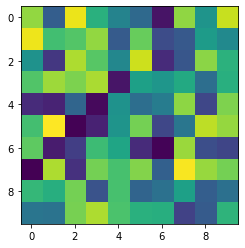

In [3]:
a = np.random.rand(10,10)
plt.imshow(a)

[[  0. -14. -20. -22.]
 [-14. -18. -20. -20.]
 [-20. -20. -18. -14.]
 [-22. -20. -14.   0.]]
Took 173 iterations


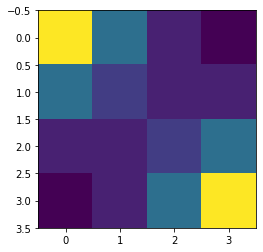

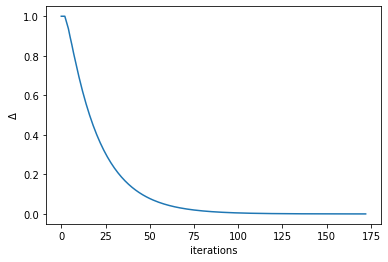

In [11]:
import random
actions = [(1,0),(0,1),(-1,0),(0,-1)]
terminal_states = {(0,0),(3,3)}
limits = (4,4)


def policy(action,state):
    return 1/len(actions)

def out_of_bounds(point):
    return not (0<=point[0]<limits[0] and 0<=point[1]<limits[1])

def is_terminal(state):
    return state in terminal_states
def expected_reward(current_state,next_state,action):
    if(is_terminal(current_state)):
        return 0
    return -1

def get_next_state(current_state,action):
    if(is_terminal(current_state)):
        return current_state
    next_state = current_state[0]+action[0],current_state[1]+action[1]
    if(out_of_bounds(next_state)):
        return current_state
    return next_state
    

def value_iteration_step(current_value_estimate,gamma):
    new_value_estimate = np.zeros(current_value_estimate.shape)
    for i in range(limits[0]):
        for j in range(limits[1]):
            for action in actions:
                current_state = (i,j)
                next_state = get_next_state((i,j),action)
                nexti,nextj = next_state
                new_value_estimate[i,j] += policy(action,current_state)*(expected_reward(current_state,next_state,action)+gamma*current_value_estimate[nexti,nextj])
    return new_value_estimate     
estimate = np.zeros(limits,dtype=float)


def value_iteration(current_estimate,gamma,epsilon):
    delta_history = []
    number_of_iterations = 0
    delta = float('inf')
    while (delta>epsilon):
        new_estimate = value_iteration_step(current_estimate,gamma)
        delta = np.max(np.abs(new_estimate-current_estimate))
        current_estimate = new_estimate
        number_of_iterations+=1
        delta_history.append(delta)
    return current_estimate,number_of_iterations,delta_history



starting_estimate = np.zeros(limits,dtype=float)
epsilon = 0.0001
gamma = 1
value_estimate, iteration,delta_history = value_iteration(starting_estimate,gamma,epsilon)
print(np.round(value_estimate,decimals=1))
print(f"Took {iteration} iterations")

plt.imshow(value_estimate)
plt.show()
plt.ylabel('$\Delta$')
plt.xlabel('iterations')
plt.plot(delta_history)
plt.show()

